In [1]:
!pip install ucimlrepo

In [2]:

from ucimlrepo import fetch_ucirepo


heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [3]:
import pandas as pd

# Assuming you have already fetched the dataset
# heart_disease = fetch_ucirepo(id=45)
# X = heart_disease.data.features
# y = heart_disease.data.targets

# Combine features and target into one DataFrame
data = pd.concat([X, y], axis=1)

# Append the target column name to the list of feature column names
all_column_names = X.columns.tolist() + ['Target']

# Set the complete column names
data.columns = all_column_names

# Display the DataFrame
print(data)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  Target  
0        3  0.0   6.0       0  
1        2  3.0   3.0  

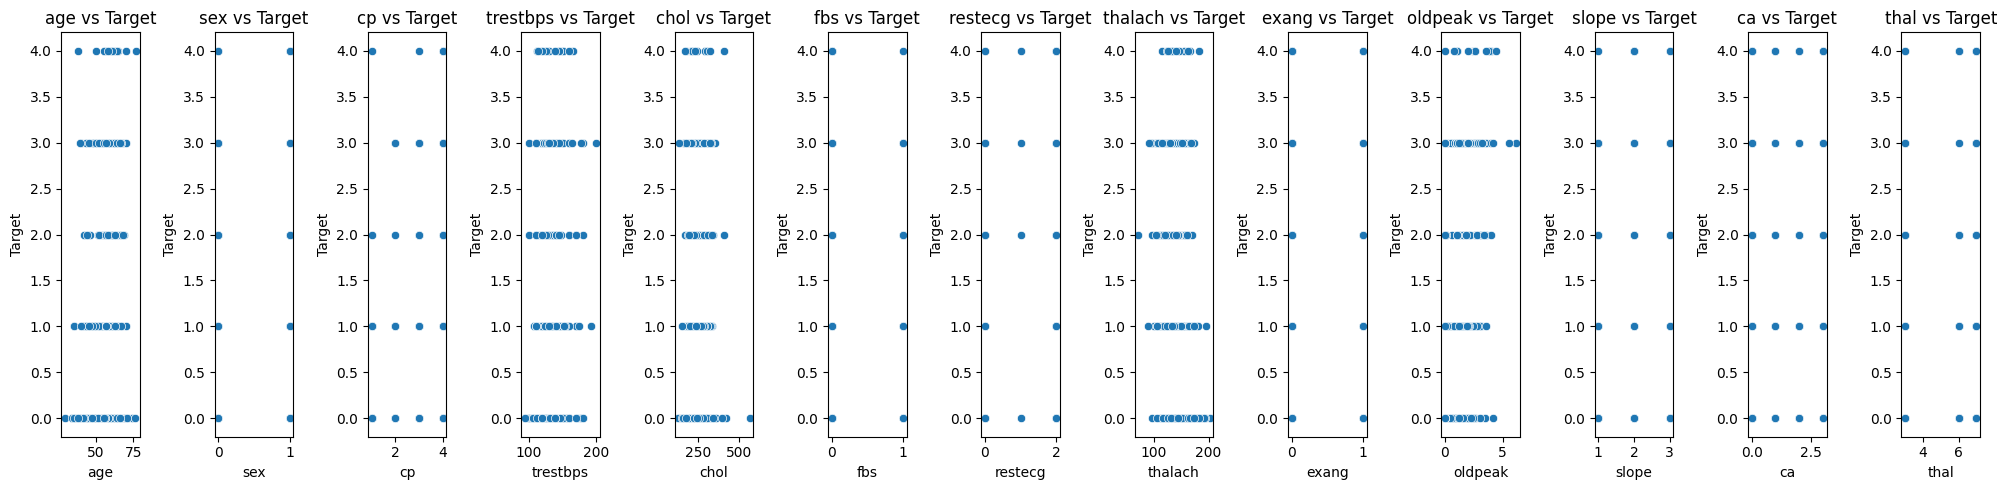

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have fetched the dataset as described earlier
# Combine features and target into one DataFrame
data = pd.concat([X, y], axis=1)

# Set the complete column names including the target
all_column_names = X.columns.tolist() + ['Target']
data.columns = all_column_names

# Plotting each feature against the target
fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(20, 5))
for i, col in enumerate(X.columns):
    sns.scatterplot(x=col, y='Target', data=data, ax=axes[i])
    axes[i].set_title(f"{col} vs Target")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Target')

plt.tight_layout()
plt.show()


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)

# Data preparation
X = heart_disease.data.features
y = heart_disease.data.targets

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_hat = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_hat)

# Use 'macro' average for F1 score, which is suitable for multiclass classification
f1 = f1_score(y_test, y_test_hat, average='macro')

# Print predictions and metrics
print(f"Predictions: {y_test_hat}")
print(f"Accuracy = {accuracy}")
print(f"F1 Score (Macro) = {f1}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predictions: [2 1 2 0 1 3 3 3 0 0 0 0 0 3 2 0 0 3 3 0 0 0 3 0 3 0 0 1 1 0 0 0 0 0 0 1 3
 0 3 0 2 0 1 0 0 3 0 0 3 2 0 0 0 0 3 0 0 3 2 2 0 0 0 0 0 3 1 0 3 3 0 0 0 1
 0 1 1 3 0 1 0 0 0 0 3 0 1 0 1 1 1]
Accuracy = 0.5494505494505495
F1 Score (Macro) = 0.29357198414756097


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and target into one DataFrame (optional step, depending on your needs)
data = pd.concat([X, y], axis=1)
all_column_names = X.columns.tolist() + ['Target']
data.columns = all_column_names

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Display the shapes of the resulting datasets
print(f"(X_train, y_train): ... {X_train.shape}")
print(f"(X_test, y_test): ... {X_test.shape}")

# Optionally, you can print the full datasets as well
print("\nX_train:\n", X_train)
print("\nX_test:\n", X_test)
print("\ny_train:\n", y_train)
print("\ny_test:\n", y_test)


(X_train, y_train): ... (242, 13)
(X_test, y_test): ... (61, 13)

X_train:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
260   44    0   3       118   242    0        0      149      0      0.3   
256   67    0   4       106   223    0        0      142      0      0.3   
112   52    1   1       118   186    0        2      190      0      0.0   
110   61    0   4       145   307    0        2      146      1      1.0   
149   60    0   3       102   318    0        0      160      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
152   67    0   3       115   564    0        2      160      0      1.6   
204   43    1   4       110   211    0        0      161      0      0.0   
53    44    1   2       130   219    0        2      188      0      0.0   
294   63    0   4       124   197    0        0      136      1      0.0   
211   38    1   1       120   231    0        0      182      1      3.8   

     slope 

Predictions: [0 2 2 2 1 4 4 3 0 1 0 0 2 3 1 0 0 0 2 0 1 0 1 0 1 0 0 3 0 1 0 2 0 3 0 0 2
 1 1 0 1 0 0 0 0 4 0 0 2 0 1 0 0 0 0 0 0 2 2 0 1 0 1 1 0 3 0 1 2 1 1 0 1 1
 0 1 1 0 0 1 0 1 0 1 4 2 2 0 0 1 1]
Accuracy = 0.42857142857142855
F1 Score (Macro) = 0.2481397052559843


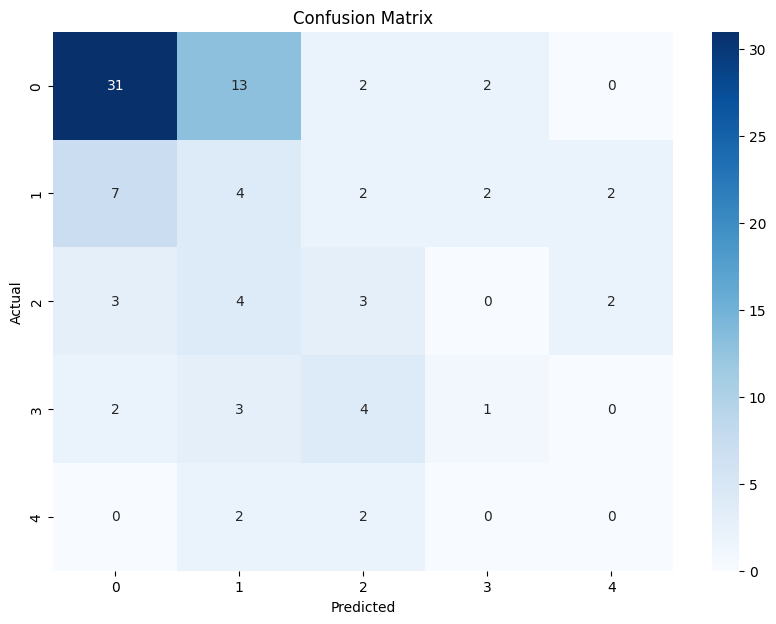

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)

# Data preparation
X = heart_disease.data.features
y = heart_disease.data.targets

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_hat = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_hat)
f1 = f1_score(y_test, y_test_hat, average='macro')

# Print predictions and metrics
print(f"Predictions: {y_test_hat}")
print(f"Accuracy = {accuracy}")
print(f"F1 Score (Macro) = {f1}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_hat)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# convert a trained model into a native code such as Python, C/C++, C#, Java, JavaScript, ...
!pip install m2cgen
import m2cgen as m2c
print("* JavaScript code:\n" + m2c.export_to_javascript(model))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 1.2 MB/s eta 0:00:00
* JavaScript code:
function score(input) {
    var var0;
    if (input[11] <= 0.8361203968524933) {
        if (input[12] <= 6.5) {
            if (input[0] <= 58.5) {
                if (input[9] <= 3.549999952316284) {
                    if (input[12] <= 3.867109537124634) {
                        if (input[3] <= 109.0) {
                            if (input[3] <= 106.5) {
                                var0 = [1.0, 0.0, 0.0, 0.0, 0.0];
                            } else {
                                if (input[4] <= 255.0) {
                                    var0 = [0.0, 1.0, 0.0, 0.0, 0.0];
                                } else {
                                    var0 = [1.0, 0.0, 0.0, 0.0, 0.0];
                                }
                            }
                        } else {
                            var0 = [1.0, 0.0, 0.0, 0.0, 0.0];
                        }
               